In [3]:
#%run -i '../../scripts/utility_readblt.py' 'mumu'

In [4]:
from utility_common import *
from utility_plotter import *
import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

# 1. Read data and MC as dataframe

In [16]:
selection  = "mumu"
nbjetcut   =  ">=1"

pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/pickle/{}/".format(selection)

cuts = GetSelectionCut("mumu") + "& (nBJets{})".format(nbjetcut)

Data = LoadDataframe(pickledir + "data2016").query(cuts)
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)

In [17]:
MCsg = pd.concat([MCt,MCtt],ignore_index=True)

MCsgf = MCsg.query('(genCategory >= 16) ') # semilep and had
MCsg0 = MCsg.query('genCategory in [1,3,4,5,6,7,8,9,10,11,12]') #other lep
MCsg1 = MCsg.query('genCategory in [2]') #mumu
MCsg2 = MCsg.query('genCategory in [13,14,15]') #mutau

df_list = [MCzz,MCdy,MCsgf,MCsg0,MCsg1,MCsg2,Data]

# 2. Plot kinematics

In [18]:
pp = pd.read_csv("plotparameters.csv")
label_list = ['Diboson','V+Jets', r'$tt/tW \rightarrow l + had$',
              r'$tt/tW \rightarrow ll$ other',
              r'$tt/tW \rightarrow \mu + \mu$',
              r'$tt/tW \rightarrow \mu+ \tau$',
              'data']
color_list = ["#a32020", "#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple", "k"]
plotoutdir = GetPlotDir(selection, nbjetcut)
print(plotoutdir)

/home/zchen/Documents/Analysis/workplace/plot/mumu/combined/


In [19]:
for index, row in pp.iterrows():
    
    v,a,b,step,xl = row["var"], row["lower"], row["upper"], row["step"], row["xlabel"]
    plotter = SelectionPlotter(v,a,b,step,df_list)
    
    plotter.settingPlot(xl,label_list,color_list,logscale=False)
    plotter.makePlot(plotoutdir)
    plt.close()
    
    # print out process
    print("making plots: {0}/{1}".format(index,len(pp)))
    clear_output(wait=True)

print('finish all making plots')

finish all making plots


/home/zchen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


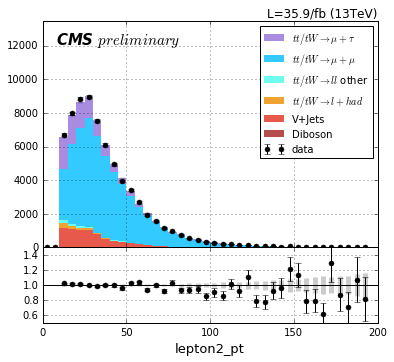

In [10]:
v,a,b,step,xl = "lepton2_pt",0,200,5,"lepton2_pt"
adj = np.array([1,1,1,1,1,1])
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=adj)
plotter.settingPlot(xl,label_list,color_list)
plotter.makePlot()

# 3. Counting

In [3]:
ctr = SelectionCounter()

In [18]:
print("(nBJets{})".format(nbjetcut))
print("MCtt: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=False)) )
print("MCtt width: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=True)) )

print("MCt : {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=False)) )
print("MCt width: {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=True)) )

(nBJets>1)
MCtt: [0, 87169, 19, 0, 702, 1, 0, 3, 0, 0, 2, 0, 3, 16435, 31, 0, 461, 0, 24, 0, 0]
MCtt width: [0, 83201.43789198286, 16.345635056495667, 0, 646.5313102034852, 0.7739574313163756, 0, 2.761712074279785, 0, 0, 1.2206032276153564, 0, 3.303257465362549, 15468.080919075695, 31.214268028736115, 0, 407.97575078540103, 0, 19.998589165508747, 0, 0]
MCt : [0, 326, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 78, 1, 0, 1, 0, 0, 0, 0]
MCt width: [0, 311.2035199177044, 0.9689044952392578, 0, 2.9473599791526794, 0, 0, 0, 0, 0, 0, 0, 0, 67.58193822845351, 0.9317941665649414, 0, 1.0120819807052612, 0, 0, 0, 0]


In [19]:
ctr.countSlt_Scaled(df_list)

data:20074.0
TotalMC:20224.584002833064
------ MC break down ------
[   33.33155654   505.52209496    83.5885415    133.43170726
 16399.39126963  3069.31883293]


In [21]:
for thisdf in [MCzz, MCdy, MCt, MCtt, Data]:
    n = np.sum(thisdf.eventWeight)
    nerr = np.sum(thisdf.eventWeight**2)**0.5
    print('{:.2f},{:.2f}'.format(n,nerr))

33.33,3.60
505.52,19.21
499.55,25.79
19186.18,61.21
20074.00,141.68


In [13]:
a = ctr.countSlt_ByTauDecay(MCtt, withweights=True)
sum(a)*MCtt.eventWeightSF.mean()

60080.96692251897

In [44]:
MCtt.eventWeightSF.mean()*155211361*(0.19244/0.192)

29838922.23649788

In [46]:
MCt.eventWeightSF.mean()*1979948*(1.29739/1.297)

2571248.5183447804

In [4]:
# print Generator information
f = ROOT.TFile("../../data/root/2016MC.root")
print("MCtt : {}".format(ctr.countGen_ByTauDecay(f,'ttbar_inclusive')) )
temp = np.array(ctr.countGen_ByTauDecay(f,'t_tw'))
temp+= np.array(ctr.countGen_ByTauDecay(f,'tbar_tw'))
print("MCt  : {}".format(list(temp)) )

MCtt : [1811409.0, 1811532.0, 3620281.0, 57057.0, 54227.0, 111125.0, 418126.0, 418126.0, 763147.0, 642646.0, 626108.0, 2350887.0, 643368.0, 627277.0, 2353727.0, 22670017.0, 22653517.0, 4016590.0, 3923504.0, 14718933.0, 70930278.0]
MCt  : [23105.0, 23040.0, 46342.0, 694.0, 717.0, 1420.0, 5260.0, 5260.0, 9727.0, 8199.0, 8029.0, 30054.0, 8163.0, 8006.0, 29970.0, 290101.0, 289467.0, 50864.0, 50050.0, 187515.0, 904067.0]


In [3]:
sign(!)

SyntaxError: invalid syntax (<ipython-input-3-7fee74031bcc>, line 1)